<center>
<h1>k-Nearest Neighbors</h1>
<h2>Classification and Regression</h2>
<h3>Julián Amaya</h3>
<h4>January 29, 2021</h4>
</center>

***

# Supervised learning
Supervised learning consists of machine learning algorithms that automate decision-making processes by generalizing from known examples. We provide the algorithm with pairs of inputs and desired outputs, and the algorithm finds a way to produce the desired output given an input. The input/output pairs that we use to build our machine learning model comprise our training set. Our goal is to make accurate predictions for new unseen data. Each row of the datset is known as a *sample* or *data point*, while the columns, which are the properties that describe this samples, are called *features*.

## 1. Classification
In classification, the goal is to predict a class label, which is a choice from a predefined list of possibilities.
- <u>Binary classification:</u> we want to classify each data point in one of two classes.
- <u>Multiclass classification:</u> classification between more than two classes.


## 1.1. k-Nearest Neighbors (k-NN)
Given a data point, we consider the k nearest neighbors and look at their labels. We count the number of neighbors which belong to each class and then assign the class that is more frequent, the *majority class* among the k-nearest neighbors.

<div class="alert alert-block alert-info">
First we will classify iris flowers into one of three possible species using physical measurements of the flowers. This is an example of a multiclass classification problem.
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("Keys of iris_dataset:\n{}".format(iris_dataset.keys()))

Keys of iris_dataset:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


<div class="alert alert-block alert-info">
Let's look at the description of the dataset.
</div>

In [3]:
print('Description of the dataset:\n\n',iris_dataset['DESCR'])

Description of the dataset:

 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== 

In [4]:
print("Feature names:\n{}\n".format(iris_dataset['feature_names']))
print("Target names:\n{}".format(iris_dataset['target_names']))

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names:
['setosa' 'versicolor' 'virginica']


### Data Set

In [5]:
print("Type of data: {}\n".format(type(iris_dataset['data'])))
print("Shape of data: {}\n".format(iris_dataset['data'].shape))
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

Type of data: <class 'numpy.ndarray'>

Shape of data: (150, 4)

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### Target

In [6]:
print("Type of target: {}\n".format(type(iris_dataset['target'])))
print("Shape of target: {}\n".format(iris_dataset['target'].shape))
print("Target:\n{}".format(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>

Shape of target: (150,)

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<div class="alert alert-block alert-info">
One part of the data, which we use to build our machine learning model, is called the <i>training set</i>. The rest of the data will be used to assess how well the model works; this is called the <i>test set</i>. We shuffle our data to make sure the test data contains data from all classes.
</div>

In [7]:
X = iris_dataset['data']
y = iris_dataset['target']

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("X_train shape: {}\n".format(X_train.shape))
print("y_train shape: {}\n".format(y_train.shape))
print("X_test shape: {}\n".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)

y_train shape: (112,)

X_test shape: (38, 4)

y_test shape: (38,)


## Exploratory data analysis

In [8]:
# Create dataframe from data in X and label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X, columns=iris_dataset.feature_names)
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


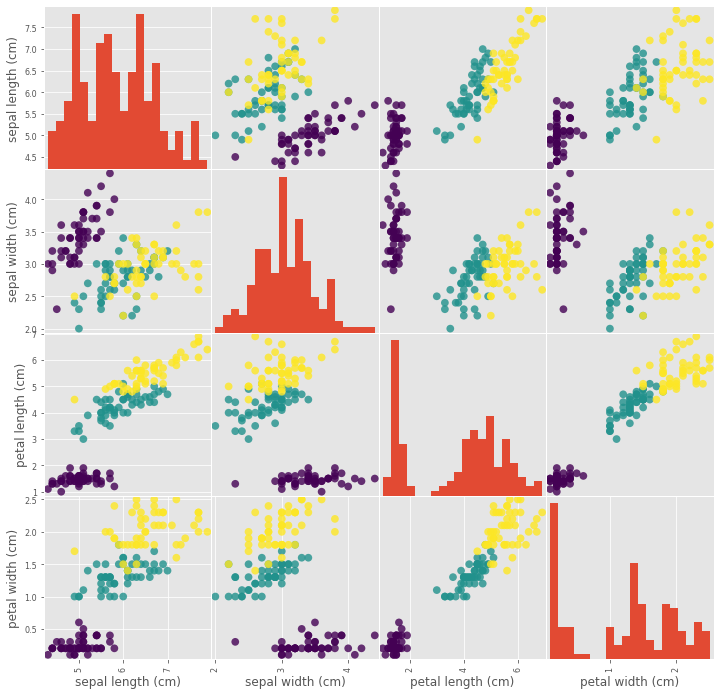

In [9]:
# Create a scatter matrix from the dataframe
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y, figsize=(12, 12), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8)

<div class="alert alert-block alert-info">
First we will work with the whole dataset, using the 4 features to predict the labels. Then we will study some low-dimensional datasets with only 2 features to get a visual representation of the model.
</div>

In [10]:
# Instantiate a k-NN classifier
knn = KNeighborsClassifier(n_neighbors = 1)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Create a new data point 
X_new = np.array([[5, 2.9, 1, 0.2]])

# Predict the label of the new point
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [11]:
# Predict the labels of the test data
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [12]:
# We can compute the accuracy manually
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

# Or we can use the .score() method
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
Test set score: 0.97


## 1.2. Model complexity: underfitting and overfitting
- <u>Overfitting:</u> building a model that is too complex for the amount of information we have. It occurs when we fit a model too closely to the particularities of the training set and obtain a model that works well on the training set but is not able to generalize to new data.
- <u>Underfitting:</u> choosing a model too simple, so it you might not be able to capture all the aspects of and variability in the data, and your model will do badly even on the training set.

<div class="alert alert-block alert-success">
The model that we would like to build lies in between, yielding the best generalization performance.
</div>

For a k-NN classifier:
- Using a few neighbors results in a decision boundary that follows the training data closely, thus resulting in a higly complex model.
- Considering more and more neighbors leads to a smoother decision boundary, which corresponds to a simpler model.

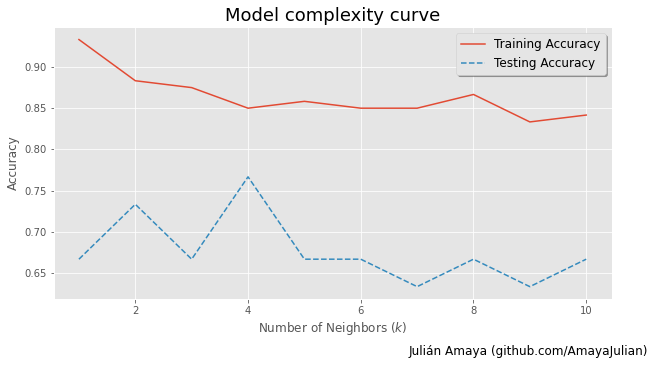

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X[:,:2], y, test_size=0.2, random_state=0)

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Instantiate a k-NN Classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # Compute the accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute the accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Plot accuracies
plt.figure(figsize = (10, 5))
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', ls='dashed')
plt.legend(prop={'size':12}, fancybox=True, shadow=True)
plt.xlabel('Number of Neighbors ($k$)', size=12)
plt.ylabel('Accuracy', size=12)
plt.title('Model complexity curve', size=18)
plt.figtext(0.95, -0.03, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

Considering a single nearest neighbor, we achive the best accuracy on the training set. But when more neighbors are considered, the model becomes simpler and the training accuracy drops. The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using a single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. The best performance is somewhere in the middle, using around 4 neighbors.

In [14]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
print('Accuracy on train set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy on train set: 0.85
Accuracy on test set: 0.77


## 1.3 Plotting decision regions
This lets us view the decision boundary, which is the divide between where the algorithm assigns the labels for the different classes.

In [15]:
def plot_decision_regions(X, y, model):
    """
    Plots the decision regions for a classifier.
    
    Arguments:
    X -- features, matrix of shape (samples, 2)
    y -- labels, column vector of shape (samples,)
    model -- trained classifier that we want to plot
        
    Returns:
    None -- this function only plots the decision regions of the classifier
    """
    x_min, x_max = X[:, 0].min() - X[:, 0].std()/2, X[:, 0].max() + X[:, 0].std()/2
    y_min, y_max = X[:, 1].min() - X[:, 1].std()/2, X[:, 1].max() + X[:, 1].std()/2

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k')
    plt.colorbar()

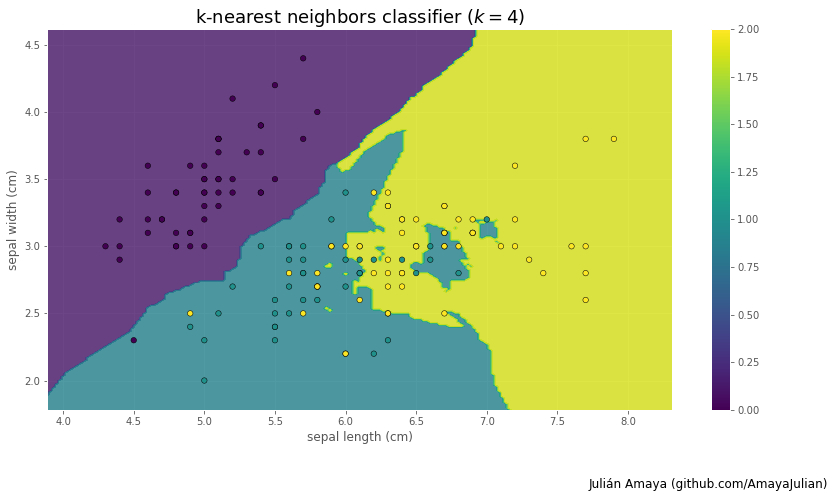

In [16]:
plt.figure(figsize = (14,7))
plot_decision_regions(X, y, knn)
plt.xlabel(iris_dataset.feature_names[0])
plt.ylabel(iris_dataset.feature_names[1])
plt.title('k-nearest neighbors classifier ($k=4$)', size=18)
plt.figtext(0.9, -0.03, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

<div class="alert alert-block alert-info">
Now, instead of using the sepal length and the sepal width as predictor variables, let's use the petal length and the petal width.
</div>

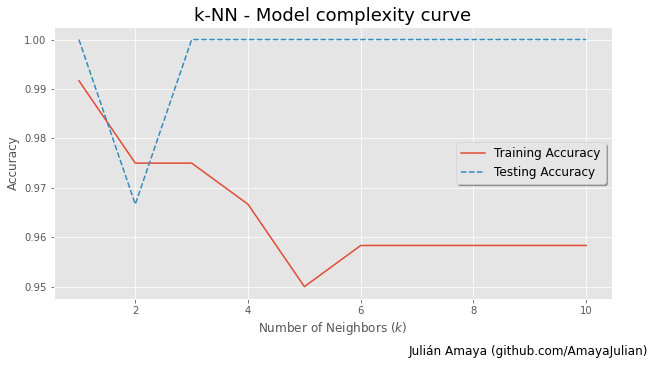

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X[:,2:], y, test_size=0.2, random_state=0)

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.figure(figsize = (10, 5))
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', ls='dashed')
plt.legend(prop={'size':12}, fancybox=True, shadow=True, loc=5)
plt.xlabel('Number of Neighbors ($k$)', size=12)
plt.ylabel('Accuracy', size=12)
plt.title('k-NN - Model complexity curve', size=18)
plt.figtext(0.95, -0.03, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

Let's choose $k=6$ so that we get a smoother decision boudary.

In [18]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
print('Accuracy on train set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy on train set: 0.96
Accuracy on test set: 1.00


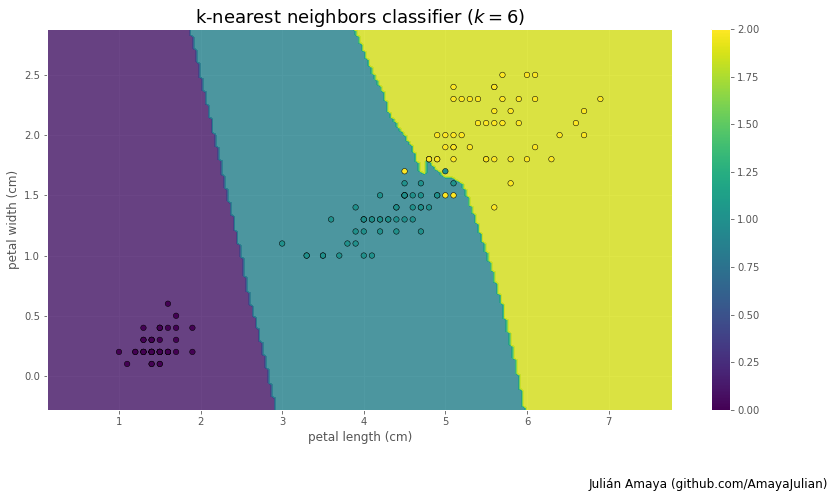

In [19]:
plt.figure(figsize = (14,7))
plot_decision_regions(X[:,2:], y, knn)
plt.xlabel(iris_dataset.feature_names[2], size=12)
plt.ylabel(iris_dataset.feature_names[3], size=12)
plt.title('k-nearest neighbors classifier ($k=6$)', size=18)
plt.figtext(0.9, -0.03, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

## 1.4 Cross validation

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X[:,2:], y, test_size=0.2, random_state=0)

# Setup a k-NN Classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn, X_train, y_train, cv=10)
print("Accuracy: {:.2f}\nStandard deviation: {:.2f}".format(scores.mean(), scores.std()))

knn.fit(X_train, y_train)

#Compute accuracy on the testing set
print('Test set accuracy: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy: 0.95
Standard deviation: 0.06
Test set accuracy: 1.00


## 1.5 Confusion matrix

In [22]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [23]:
# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Instantiate a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))

Confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



<div class="alert alert-block alert-info">
Let's look at another classification example using the breast cancer dataset.
</div>

In [24]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print('cancer.keys():\n{}'.format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [25]:
print('cancer[\'DESCR\']:\n{}'.format(cancer['DESCR']))

cancer['DESCR']:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, fie

In [26]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [27]:
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [28]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [29]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Exploratory data analysis

In [30]:
cancer_dataframe = pd.DataFrame(X_train, columns=cancer.feature_names)
cancer_dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007
1,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
2,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
3,13.59,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263
4,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.18,26.56,127.30,1084.0,0.1009,0.29200,0.24770,0.08737,0.4677,0.07623


Let's explore the scatter matrix for the first five features.

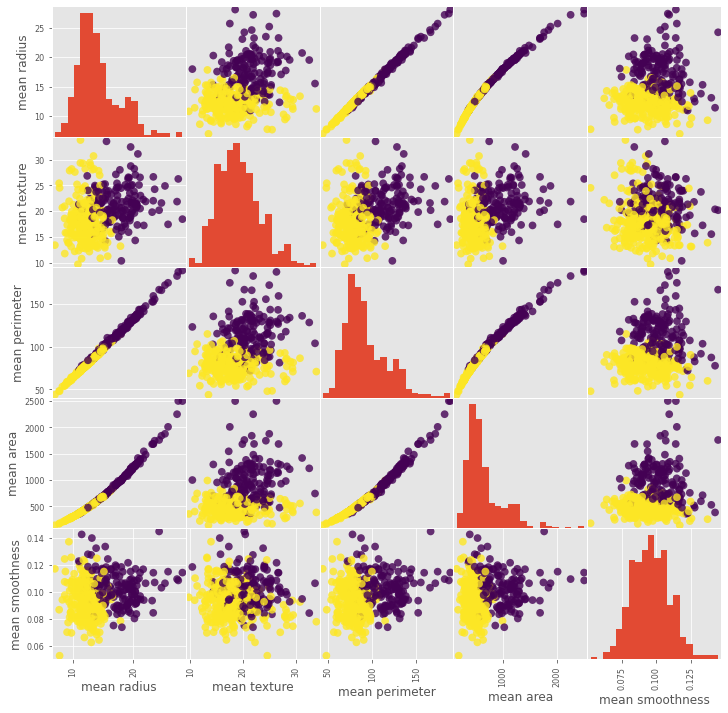

In [31]:
grr = pd.plotting.scatter_matrix(cancer_dataframe.iloc[:,:5], c=y_train, figsize=(12, 12), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8)

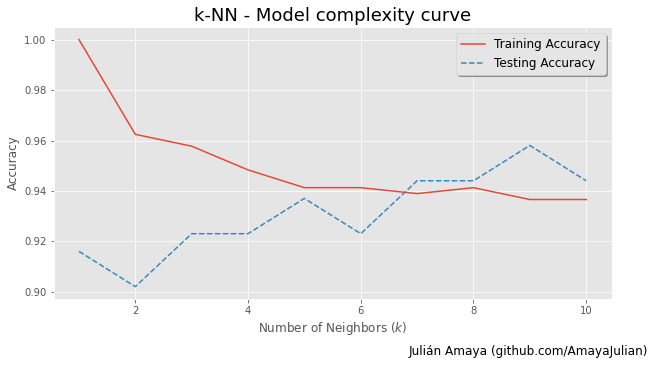

In [32]:
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)

    test_accuracy[i] = knn.score(X_test, y_test)

plt.figure(figsize = (10, 5))
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', ls='dashed')
plt.legend(prop={'size':12}, fancybox=True, shadow=True)
plt.xlabel('Number of Neighbors ($k$)', size=12)
plt.ylabel('Accuracy', size=12)
plt.title('k-NN - Model complexity curve', size=18)
plt.figtext(0.95, -0.03, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

In [33]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Train accuracy: {:.2f}'.format(knn.score(X_train, y_train)))
print('Test accuracy: {:.2f}'.format(knn.score(X_test, y_test)))

Train accuracy: 0.94
Test accuracy: 0.96


<div class="alert alert-block alert-info">
Now let's fit a k-NN classifier using only two features: mean perimeter and mean smoothness.
</div>

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X[:,(2,4)], y, test_size=0.25, random_state=0)

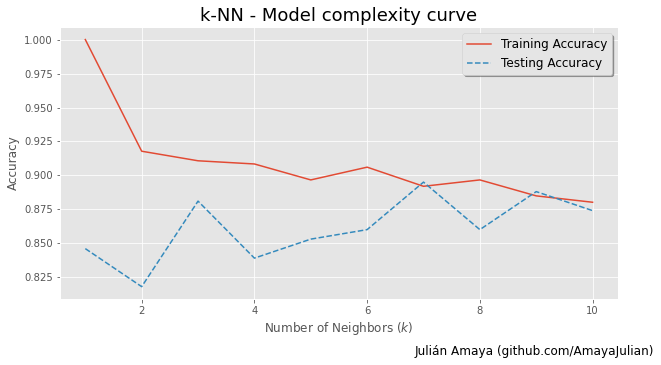

In [35]:
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)

    test_accuracy[i] = knn.score(X_test, y_test)

plt.figure(figsize = (10, 5))
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', ls='dashed')
plt.legend(prop={'size':12}, fancybox=True, shadow=True)
plt.xlabel('Number of Neighbors ($k$)', size=12)
plt.ylabel('Accuracy', size=12)
plt.title('k-NN - Model complexity curve', size=18)
plt.figtext(0.95, -0.03, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

In [36]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('Train accuracy: {:.2f}'.format(knn.score(X_train, y_train)))
print('Test accuracy: {:.2f}'.format(knn.score(X_test, y_test)))

Train accuracy: 0.89
Test accuracy: 0.90


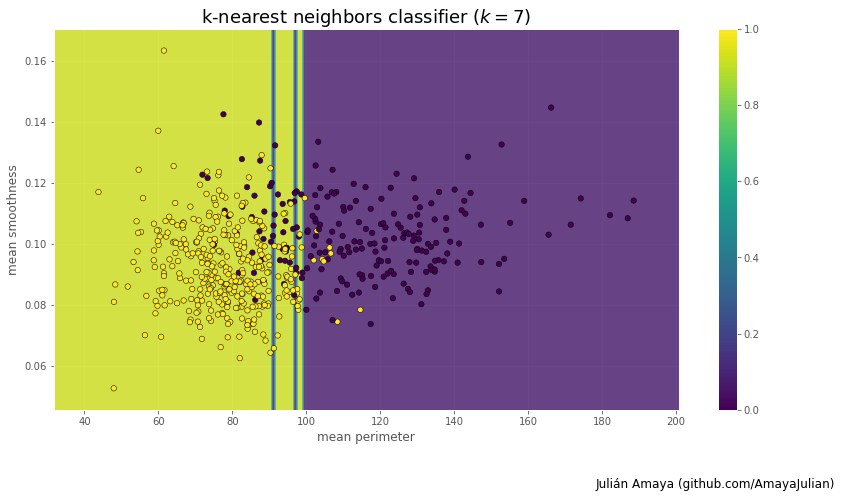

In [37]:
plt.figure(figsize = (14,7))
plot_decision_regions(X[:,(2,4)], y, knn)
plt.xlabel(cancer.feature_names[2], size=12)
plt.ylabel(cancer.feature_names[4], size=12)
plt.title('k-nearest neighbors classifier ($k=7$)', size=18)
plt.figtext(0.9, -0.03, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

***

# 2. Regression

In regression problems we want to make a prediction for an output in which there is some kind of continuity, hence the prediction is a real number.

## 2.1 k-NN regression

We select the k nearest neighbors, and use the mean of the target values as our prediction.

## 2.2 Evaluating model performance

We can evaluate the model using the .score() method, which returns the $R^{2}$ score, also known as the _coefficient of determination_. It's a measure of goodness of a prediction for a regression model, and it is defined as:

\begin{equation}
R^{2}=1-\frac{\sum_{i}{(y_{i}-\hat{y}_{i})^{2}}}{\sum_{i}{(y_{i}-\bar{y})^{2}}}
\end{equation}

The numerator is the *residual sum of squares*, and the denominator the *total sum of squares*.
- The best possible score is $R^{2}=1$.
- A constant model that always predicts the expected value of $y$, disregarding the input features, would get $R^{2}=0$.

In [38]:
from sklearn.datasets import load_boston
boston = load_boston()
print('boston.keys():\n{}'.format(boston.keys()))

boston.keys():
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [39]:
print('boston[\'DESCR\']:\n\n{}'.format(boston['DESCR']))

boston['DESCR']:

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
   

In [40]:
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [41]:
X = boston.data
y = boston.target

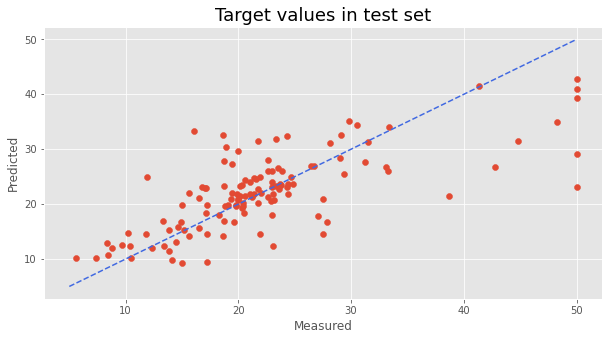

In [42]:
from sklearn.neighbors import KNeighborsRegressor

# Split the dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model and set the number of neighbors
reg = KNeighborsRegressor(n_neighbors=3)

# Fit the model on the training data
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

plt.figure(figsize = (10, 5))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], ls='dashed', color='royalblue')
plt.xlabel('Measured', size=12)
plt.ylabel('Predicted', size=12)
plt.title('Target values in test set', size=18)
plt.show()

In [43]:
print('Train set R2: {:.2f}'.format(reg.score(X_train, y_train)))
print('Test set R2: {:.2f}'.format(reg.score(X_test, y_test)))

Train set R2: 0.78
Test set R2: 0.51


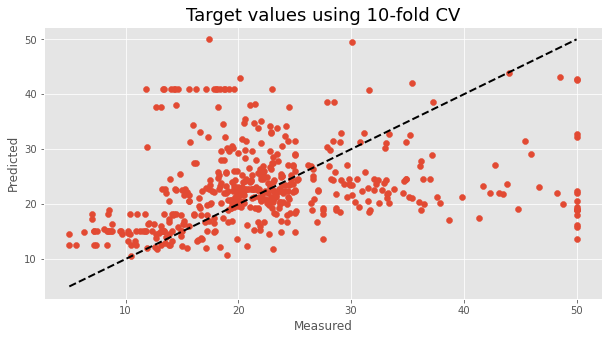

In [44]:
from sklearn.model_selection import cross_val_predict

reg = KNeighborsRegressor(n_neighbors=3)

# Predictions obtained using cross validation
predicted = cross_val_predict(reg, X, y, cv=10)

plt.figure(figsize = (10, 5))
plt.scatter(y, predicted)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='k', ls='dashed', lw=2)
plt.xlabel('Measured', size=12)
plt.ylabel('Predicted', size=12)
plt.title('Target values using 10-fold CV', size=18)
plt.show()

## Exploratory Data Analysis

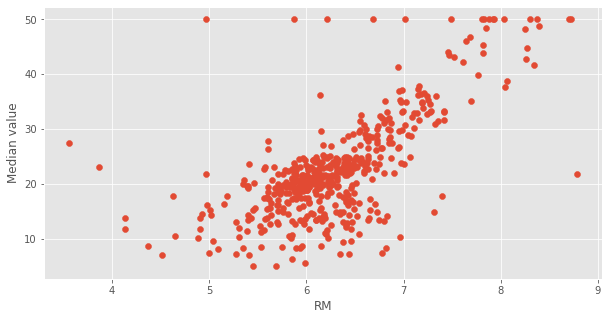

In [45]:
# Feature number (0 to 12)
n = 5

plt.figure(figsize = (10, 5))
plt.scatter(X[:,n], y)
plt.xlabel(boston.feature_names[n], size=12)
plt.ylabel('Median value', size=12)
plt.show()

Looking at the description of the dataset we see that the feature RM corresponds to the average number of rooms per dwelling.

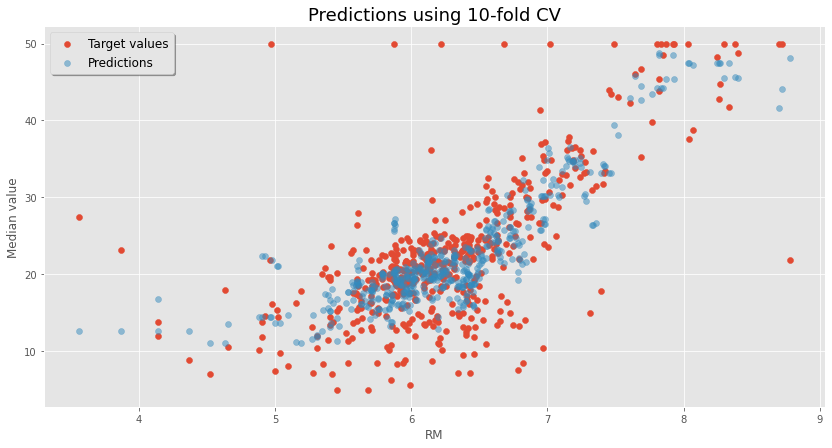

In [46]:
reg = KNeighborsRegressor(n_neighbors=5)
predicted = cross_val_predict(reg, X[:,5].reshape(-1,1), y, cv=10)

plt.figure(figsize = (14, 7))
plt.scatter(X[:,5], y, label='Target values')
plt.scatter(X[:,5], predicted, alpha=0.5, label='Predictions')
plt.xlabel('RM', size=12)
plt.ylabel('Median value', size=12)
plt.title('Predictions using 10-fold CV', size=18)
plt.legend(prop={'size':12}, fancybox=True, shadow=True)
plt.show()

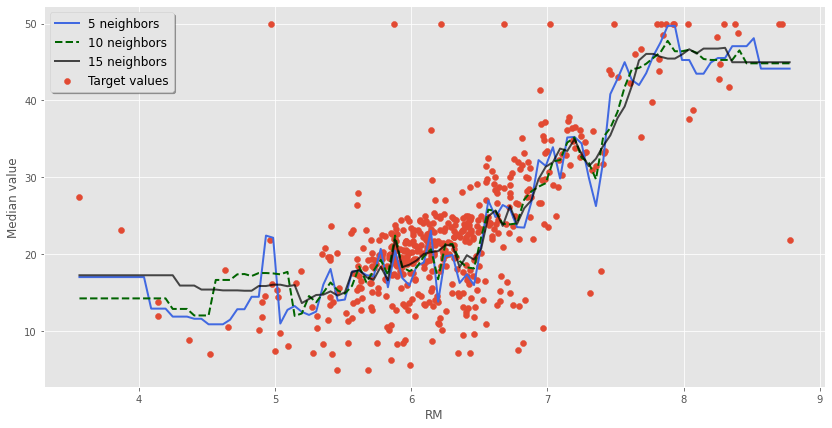

In [47]:
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(X[:,5].reshape(-1,1), y)
x = np.linspace(X[:,5].min(), X[:,5].max(), 100)
y_pred = reg.predict(x.reshape(-1,1))

reg = KNeighborsRegressor(n_neighbors=10)
reg.fit(X[:,5].reshape(-1,1), y)
y_pred2 = reg.predict(x.reshape(-1,1))

reg = KNeighborsRegressor(n_neighbors=15)
reg.fit(X[:,5].reshape(-1,1), y)
y_pred3 = reg.predict(x.reshape(-1,1))

plt.figure(figsize = (14, 7))
plt.scatter(X[:,5], y, label='Target values')
plt.plot(x, y_pred, color='royalblue', lw=2, ls='-', label='5 neighbors')
plt.plot(x, y_pred2, color='darkgreen', lw=2, ls='dashed', label='10 neighbors')
plt.plot(x, y_pred3, color='k', lw=2, alpha=0.7, label='15 neighbors')
plt.xlabel('RM', size=12)
plt.ylabel('Median value', size=12)
plt.legend(prop={'size':12}, fancybox=True, shadow=True)
plt.show()

<div class="alert alert-block alert-info">
Let's compare this results with the ones obtained using a linear model.
</div>

## 2.3 Linear regression
Linear models make a prediction using a linear function of the input features. For regression, the general prediction formula for a linear model is given by:

\begin{equation}
\hat{y}=w[0]*x[0]+w[1]*x[1]+...+w[p]*x[p]+b
\end{equation}

There are many different linear models for regression. The difference between these models lies in how the model parameters $w$ and $b$ are learned from the training data, and how model complexity can be controlled.

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set.

In [48]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

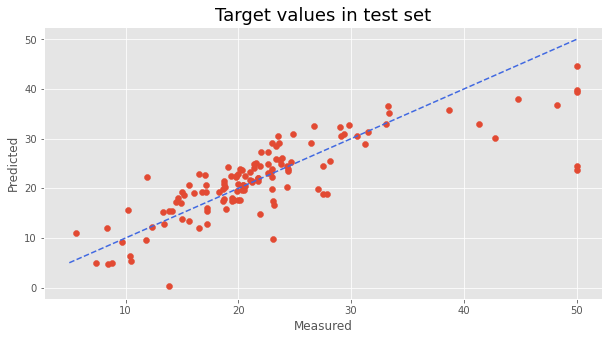

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

plt.figure(figsize = (10, 5))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], ls='dashed', color='royalblue')
plt.xlabel('Measured', size=12)
plt.ylabel('Predicted', size=12)
plt.title('Target values in test set', size=18)
plt.show()

In [50]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
lr.intercept_: 36.933255457118975


In [51]:
print('Training set R2: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set R2: {:.2f}'.format(lr.score(X_test, y_test)))

Training set R2: 0.77
Test set R2: 0.64


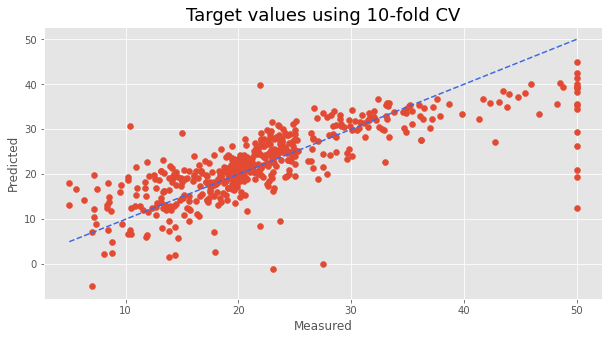

In [52]:
lr = LinearRegression()

# Predictions obtained using cross validation
predicted = cross_val_predict(lr, X, y, cv=10)

plt.figure(figsize = (10, 5))
plt.scatter(y, predicted)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='royalblue', ls='dashed')
plt.xlabel('Measured', size=12)
plt.ylabel('Predicted', size=12)
plt.title('Target values using 10-fold CV', size=18)
plt.show()

# 3. Conclusions
- One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments. Using this algorithm is a good baseline method to try before considering more advanced techniques.
- Building the nearest neighbors model is usually very fast, but when your training set is very large (either in number of features or in number of samples) prediction can be slow.
- When using the k-NN algorithm, it’s important to preprocess your data.
- This approach often does not perform well on datasets with many features (hundreds or more), and it does particularly badly with sparse datasets.

<div class="alert alert-block alert-info">
So, while the nearest k-neighbors algorithm is easy to understand, it is not often used in practice, due to prediction being slow and its inability to handle many features.
</div>

# 4. References
- Coursera Specialization *Python 3 Programming* - University of Michigan
- Coursera Specialization *Deep Learning* - deeplearning.ai 
- edX online course *Using Python for Research* - HarvardX
- DataCamp Career Track *Machine Learning Scientist with Python*
- *An Introduction to Machine Learning with Python* by Andreas C. Müller and Sarah Guido (O’Reilly). Copyright 2017 Sarah Guido and Andreas Müller, 978-1-449-36941-5.